In [1]:
# Standard imports
from pathlib import Path
import pandas as pd
import numpy as np

# Import our refactored modules
from athletes_brain.fig1 import (
    Fig1Config,
    AthletesBrainDataLoader,
    GroupComparison,
    BrainPlotter,
    generate_figure1,
)

# Import specific functions for focused analysis
from athletes_brain.fig1.main import analyze_specific_comparison, get_most_significant_regions

2025-09-07 16:46:39.551 | INFO     | athletes_brain.config:<module>:11 - PROJ_ROOT path is: /home/galkepler/Projects/athletes_brain


In [2]:
metrics = ["gm_vol", "wm_vol", "csf_vol", "adc", "fa", "ad", "rd"]
# Initialize configuration
config = Fig1Config()
config.METRICS = metrics

# Set up matplotlib configuration for consistent plots
config.setup_matplotlib_config()

# Display configuration
print(f"Atlas: {config.ATLAS}")
print(f"Metrics: {config.METRICS}")
print(
    f"Group labels: {config.CLIMBER_GROUP_LABEL}, {config.BJJ_GROUP_LABEL}, {config.CONTROL_GROUP_LABEL}"
)
print(f"P-value threshold: {config.P_THRESHOLD}")
print(f"Visualization range: [{config.VMIN}, {config.VMAX}]")

Atlas: schaefer2018tian2020_400_7
Metrics: ['gm_vol', 'wm_vol', 'csf_vol', 'adc', 'fa', 'ad', 'rd']
Group labels: Climbing, Bjj, Control
P-value threshold: 0.05
Visualization range: [-5, 5]


In [3]:
output_dir = Path("/media/storage/phd") / "athletes_brain" / "figures" / "bag_analysis"

In [4]:
# Initialize data loader
data_loader = AthletesBrainDataLoader(config)

# Load all data
metric_data, parcels, nifti_path, nifti_matlab_path = data_loader.load_all_data()

print(f"Loaded {len(metric_data)} metrics")
print(f"Loaded {len(parcels)} brain parcels")
print(f"Metrics: {list(metric_data.keys())}")

# Display sample data (demographics)
d = metric_data["gm_vol"].drop_duplicates(subset=["subject_code"], keep="first")
print(f"N participants: {d.shape[0]}")

2025-09-07 16:46:46.462 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:48 - Loading metric data...
2025-09-07 16:46:46.462 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading gm_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:47:03.365 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for gm_vol
2025-09-07 16:47:03.365 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading wm_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:47:19.736 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for wm_vol
2025-09-07 16:47:19.736 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading csf_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:47:35.654 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for csf_vol
2025-09-07 16:47:35.654 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading adc data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:47:47.927 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for adc
2025-09-07 16:47:47.927 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading fa data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:48:00.130 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for fa
2025-09-07 16:48:00.131 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading ad data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:48:13.549 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for ad
2025-09-07 16:48:13.550 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading rd data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:48:30.283 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for rd
2025-09-07 16:48:30.283 | SUCCESS  | athletes_brain.fig1.data_loader:load_metric_data:84 - Successfully loaded 7 metrics
2025-09-07 16:48:30.283 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:32 - Loading atlas data for schaefer2018tian2020_400_7
2025-09-07 16:48:30.285 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:39 - Loaded 454 parcels from atlas
Loaded 7 metrics
Loaded 454 brain parcels
Metrics: ['gm_vol', 'wm_vol', 'csf_vol', 'adc', 'fa', 'ad', 'rd']
N participants: 2709


In [5]:
import pandas as pd
from functools import reduce

region_col = config.REGION_COL


def long_to_wide(
    long_df,
    *,
    index="subject_code",
    columns=region_col,
    values="value",
):
    """Pivot a long metric table → wide DataFrame (subjects × regions)."""
    wide = long_df.pivot_table(index=index, columns=columns, values=values)
    # Optional: drop regions with >20 % missing values
    # thresh = int(0.8 * len(wide))
    # wide = wide.dropna(axis=1, thresh=thresh)
    # Optional: drop subejcts with >20 % missing values
    # thresh = int(0.8 * len(parcels))
    # wide = wide.dropna(axis=0, thresh=thresh)
    return wide


def prep_metric_matrices(metric_dict, *, index="subject_code", target_column="age_at_scan"):
    """
    Parameters
    ----------
    metric_dict : {metric_name: long_df}
        Each DataFrame must include `subject_id`, `region`, `value`,
        `age_at_scan`, and any covariates you want.
    Returns
    -------
    X_dict : {metric_name: ndarray}
             Wide feature matrices aligned on the *intersection* of subjects.
    y, w, cov_df : Series / ndarray
             Age, weights, and any extra covariates for the same subjects.
    """
    # 1.  Convert every long → wide
    wide_dict = {m: long_to_wide(df, index=index) for m, df in metric_dict.items()}

    # 2.  Intersect subject index across all metrics
    common_subs = reduce(pd.Index.intersection, [w.index for w in wide_dict.values()])

    # 3.  Slice & order every matrix
    for m in wide_dict:
        wide_dict[m] = wide_dict[m].loc[common_subs]

    # 4.  Pull y, w, covariates from *any* of the long dfs (they all duplicate)
    ref_long = next(iter(metric_dict.values()))
    ref_meta = (
        ref_long.drop_duplicates(subset=index)  # one row per subject
        .set_index(index)
        .reindex(common_subs)
    )
    # ref_meta = ref_long[ref_long[index].isin(common_subs)]
    y = ref_meta[target_column].astype(float)

    cov = ref_meta[ref_meta.columns.difference([target_column])]

    # 5.  Convert features to numpy (sklearn ready)
    X_dict = {m: wide for m, wide in wide_dict.items()}
    return X_dict, y, cov

In [6]:
# -------------------------------------------------------
# Build (X, y, w, cov) once, re-use in every metric loop
# -------------------------------------------------------
X_dict, y, cov = prep_metric_matrices(metric_data, index="session_id")
# y_mean = y.mean()
# y = y - y_mean  # center the target variable
# Example list of covariates you want to *keep* (z-scored later if needed)
cov_names = {
    m: ["sex"] if "vol" not in m else ["sex", "tiv"] for m in metrics
}  # e.g. ["sex", "tiv"]

<Axes: xlabel='age_at_scan', ylabel='Density'>

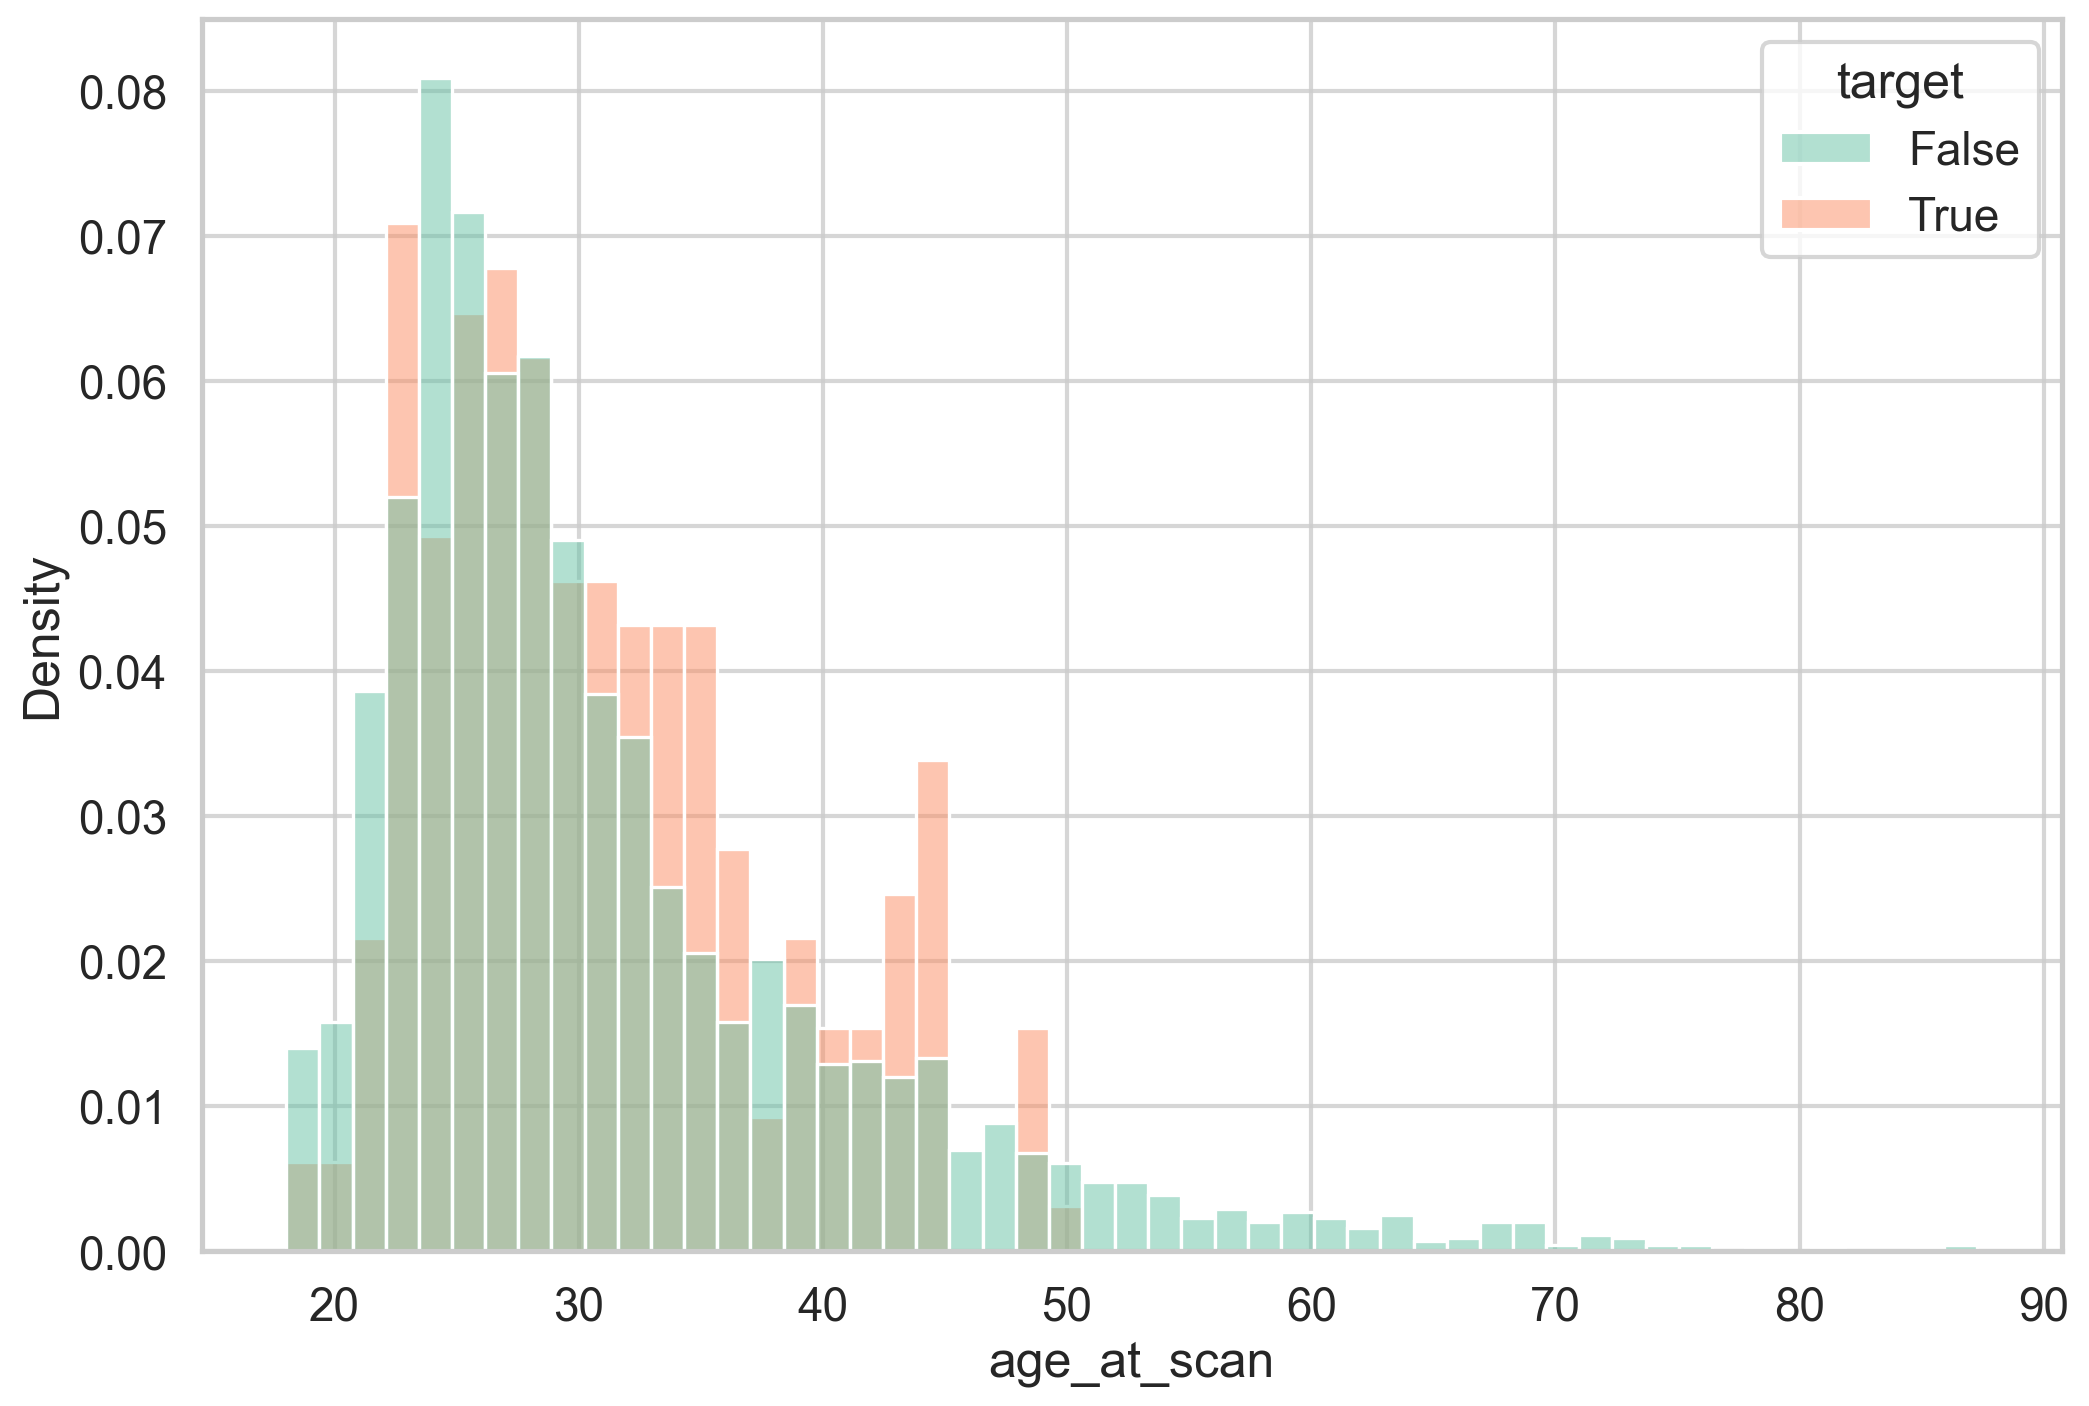

In [7]:
import seaborn as sns

cov["age_at_scan"] = y


sns.histplot(hue="target", x="age_at_scan", data=cov, common_norm=False, stat="density")

In [8]:
import numpy as np, pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import (
    ElasticNet,
    RidgeCV,
    ElasticNetCV,
    LassoCV,
    Ridge,
    Lasso,
    SGDRegressor,
)

# xgb
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, GroupKFold
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

alphas = np.logspace(-3, 4, 30)  # ridge λ grid

outer_cv = GroupKFold(
    n_splits=10,
    # shuffle=True,
    # random_state=1,
)

ESTIMATORS = {
    "ElasticNet": ElasticNet(max_iter=int(1e6)),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=int(1e6)),
    "HistGB": HistGradientBoostingRegressor(),
    "xgboost": xgb.XGBRegressor(
        n_estimators=1000,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    ),
}

PARAM_GRIDS = {
    "ElasticNet": {
        "estimator__l1_ratio": [0.2, 0.5, 0.9, 1.0],  # l1_ratio for ElasticNet
        "estimator__alpha": alphas,  # alpha for ElasticNet
    },
    "Ridge": {
        "estimator__alpha": alphas,  # alpha for Ridge
    },
    "Lasso": {
        "estimator__alpha": alphas,  # alpha for Lasso
    },
    "HistGB": {
        "estimator__max_iter": [100, 200, 300],
        "estimator__max_depth": [3, 5, 7],
        "estimator__learning_rate": [0.01, 0.1, 0.2],
    },
    "xgboost": {
        "estimator__n_estimators": [100, 200, 300],
        "estimator__max_depth": [3, 5, 7],
        "estimator__learning_rate": [0.01, 0.1, 0.2],
        "estimator__subsample": [0.8, 1.0],
        "estimator__colsample_bytree": [0.8, 1.0],
    },
}
# Choose model and define parameter grid(s)
estimator_name = "Ridge"  # Example: using xgboost
estimator = ESTIMATORS[estimator_name]  # xgboost model
param_grid = PARAM_GRIDS[estimator_name]  # xgboost grid

# param_grid.update({
#     "pca__n_components": [0.7, 0.8, 0.9, X.shape[1]],  # PCA components
# })

# pca = PCA(n_components=0.9, random_state=42)  # PCA for dimensionality reduction

scaler = RobustScaler()

# estimator = BiasCorrectedRegressor(
#     base_estimator=base_estimator,
#     # correction_type="beheshti" if apply_correction else "none",  # correction type
#     correction_type="none",
#     degree=1,  # degree of polynomial for correction (1 for linear)
#     # degree=3,
#     # post_hoc_correction=(post_hoc_degree > 0),
#     # correction_method = "linear" if post_hoc_degree == 1 else "none",
#     # use_weights=use_weights,
#     # cv=outer_cv
# )

pipeline = Pipeline(
    [
        ("scaler", scaler),  # StandardScaler for feature scaling
        # ("pca", pca),  # PCA for dimensionality reduction
        ("estimator", estimator),  # Base estimator (e.g., xgboost)
    ]
)

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=outer_cv,
    scoring="neg_mean_absolute_error",
    n_jobs=4,
    refit=True,
    verbose=0,
)

groups = cov["subject_code"]

In [9]:
import numpy as np
from joblib import Parallel, delayed
from sklearn.utils import indexable
from sklearn.model_selection import check_cv
from sklearn.base import clone, is_classifier
from sklearn.utils.validation import _num_samples
import scipy.sparse as sp


def _fit_predict_correct(estimator, X, y, train, test, fit_params, method, correction_func):
    est = clone(estimator)
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    # Subset fit_params containing sample_weight (and any other sample-aligned params)
    fit_params_fold = {}
    for k, v in fit_params.items():
        if v is not None and hasattr(v, "__len__") and len(v) == len(y):
            # If this param looks like sample_weights, subset by train indices
            fit_params_fold[k] = v[train]
        else:
            fit_params_fold[k] = v

    est.fit(X_train, y_train, **fit_params_fold)
    y_train_pred = getattr(est, method)(X_train)
    y_test_pred = getattr(est, method)(X_test)
    y_test_pred_corr = correction_func(y_train, y_train_pred, y_test_pred, y_test)
    return y_test_pred_corr


def corrected_cross_val_predict(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    params=None,
    pre_dispatch="2*n_jobs",
    method="predict",
    correction_func=None,
):
    """
    Generate cross-validated, *bias-corrected* predictions for each input data point.

    This function works just like sklearn's cross_val_predict, but applies the supplied correction_func
    after each split's model is fit and before predictions are returned. The correction_func
    must have the signature:
        y_test_corr = correction_func(y_train, y_train_pred, y_test_pred, y_test)
    """

    X, y, groups = indexable(X, y, groups)
    if params is None:
        params = {}

    cv = check_cv(cv, y, classifier=is_classifier(estimator))
    splits = list(cv.split(X, y, groups))

    test_indices = np.concatenate([test for _, test in splits])
    if np.unique(test_indices).size != _num_samples(X):
        raise ValueError(
            "cross_val_predict only works for partition splits (all samples must appear in exactly one test set)"
        )

    fit_params = params if params is not None else {}

    parallel = Parallel(n_jobs=n_jobs, verbose=verbose, pre_dispatch=pre_dispatch)

    predictions = parallel(
        delayed(_fit_predict_correct)(
            estimator, X, y, train, test, fit_params, method, correction_func
        )
        for train, test in splits
    )

    # Reassemble predictions according to test indices (as in sklearn)
    inv_test_indices = np.empty(len(test_indices), dtype=int)
    inv_test_indices[test_indices] = np.arange(len(test_indices))

    if sp.issparse(predictions[0]):
        predictions = sp.vstack(predictions, format=predictions[0].format)
    else:
        predictions = np.concatenate(predictions)

    return predictions[inv_test_indices]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def cole_bias_correction(y_train, y_tr_pred, y_te_pred, degree=1):
    """
    The technique proposed by Cole et al. is to use the slope and intercept of a linear regression model of estimated brain age versus chronological age obtained from training results(Cole et al., 2018). Indeed, for each sample under study, the bias-free Brain-age value was achieved by subtracting the intercept from predicted brain age and then divided by the slope of a linear regression model of estimated brain age on chronological age obtained from the training set

    Parameters
    ----------
    y_train : np.ndarray
        True ages for the training set.
    y_tr_pred : np.ndarray
        Predicted ages for the training set.
    y_te_pred : np.ndarray
        Predicted ages for the test set.

    Returns
    -------
    np.ndarray
        Bias-corrected predicted ages for the test set.
    """
    # Fit a linear regression model to the training data
    model = LinearRegression()
    model.fit(y_train.reshape(-1, 1), y_tr_pred)
    a = model.coef_[0]  # slope
    b = model.intercept_  # intercept

    # Apply the correction to the test set predictions
    y_te_corrected = (y_te_pred - b) / a

    return y_te_corrected


def beheshti_bias_correction(y_train, y_tr_pred, y_te_pred, degree=1):
    """
    The technique proposed by Beheshti et al. is to use a linear regression model to fit the difference between predicted and true ages on the training set, and then apply this correction to the test set predictions.

    Parameters
    ----------
    y_train : np.ndarray
        True ages for the training set.
    y_tr_pred : np.ndarray
        Predicted ages for the training set.
    y_te_pred : np.ndarray
        Predicted ages for the test set.

    Returns
    -------
    np.ndarray
        Bias-corrected predicted ages for the test set.
    """
    # Fit a linear regression model to the training data
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    estimator = LinearRegression()
    model = Pipeline([("poly", poly), ("est", estimator)])
    offset = y_tr_pred - y_train
    model.fit(y_train.reshape(-1, 1), offset)

    # Apply the correction to the test set predictions
    y_te_corrected = y_te_pred - model.predict(y_te_pred.reshape(-1, 1))

    return y_te_corrected


def delange_correction(y_train, y_tr_pred, y_te_pred, y_te_true):
    model = LinearRegression().fit(y_train.reshape(-1, 1), y_tr_pred)
    alpha = model.coef_[0]
    beta = model.intercept_
    correction = y_te_true - (alpha * y_te_true + beta)
    y_te_corrected = y_te_pred + correction
    return y_te_corrected


def beheshti_correction(y_train, y_tr_pred, y_te_pred, y_te_true):
    delta = y_tr_pred - y_train
    model = LinearRegression().fit(y_train.reshape(-1, 1), delta)
    alpha = model.coef_[0]
    beta = model.intercept_
    bias = alpha * y_te_true + beta
    y_te_corrected = y_te_pred - bias
    return y_te_corrected

In [11]:
import numpy as np, pandas as pd
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

alphas = np.logspace(-3, 4, 30)  # ridge λ grid

outer_cv = KFold(
    n_splits=5,
    shuffle=True,
    random_state=1,
)

perf_rows = []

use_weights = False
# do_post_hoc_correction = True
post_hoc_degree = 1
apply_correction = True

predictions = {}

for metric, X in X_dict.items():
    # Optionally concatenate covariates
    covariates = cov_names[metric]
    if cov_names:
        X_model = pd.concat([X, cov[covariates]], axis=1)
    else:
        X_model = X
    X_model.columns = X_model.columns.astype(str)
    # y_pred = stratified_regression_cv(X_model, y, w, n_splits=10, n_bins=10)
    grid.fit(X_model, y, groups=groups)
    model = grid.best_estimator_
    # y_pred = model.predict(X_model, **{"y_chron": y} if apply_correction else {})
    y_pred = corrected_cross_val_predict(
        estimator=model,
        X=X_model.to_numpy(),
        y=y.to_numpy(),
        cv=outer_cv,
        correction_func=beheshti_correction if apply_correction else None,
        groups=groups,
    )
    # y_pred = manual_cross_val_predict(
    #     model=model,
    #     X=X_model,
    #     y=y,
    #     cv=outer_cv,
    #     sample_weight=w if use_weights else None,
    #     apply_correction=apply_correction,
    # )
    residuals = y_pred - y
    predictions_df = cov.copy()
    predictions_df["True"] = y
    predictions_df["Predicted"] = y_pred
    # predictions_df["raw_residuals"] = original_residuals
    predictions_df["corrected_residuals"] = residuals
    predictions[metric] = predictions_df
    perf_rows.append(
        dict(
            metric=metric,
            model=model,
            # R2=r2_score(y, y_pred, sample_weight=w if use_weights else None),
            # MAE=mean_absolute_error(y, y_pred, sample_weight=w if use_weights else None),
            # RMSE=root_mean_squared_error(y, y_pred, sample_weight=w if use_weights else None),
            R2=r2_score(y, y_pred),
            MAE=mean_absolute_error(y, y_pred),
            RMSE=root_mean_squared_error(y, y_pred),
        )
    )
    # y_pred, original_residuals, corrected_residuals = cross_val_predict_with_bias_correction(
    #     model=model,
    #     X=X_model,
    #     y_chronological=y,
    #     w=w,
    #     cv=outer_cv,
    #     use_weights=use_weights,
    #     post_hoc_degree=post_hoc_degree,
    #     # residual_orthog_degree=post_hoc_degree,
    # )

    # y_pred = cross_val_predict(
    #     model,
    #     X_model,
    #     y,
    #     # groups=age_strata(y),
    #     cv=outer_cv,
    #     params={"estimator__sample_weight": w if use_weights else None},
    #     n_jobs=-1,
    # )
    # if do_post_hoc_correction:
    #     resid = y - y_pred
    #     z = np.polyfit(y, resid, 2)
    #     p = np.poly1d(z)
    #     y_pred = y_pred + p(y)
    # # Save predictions

    # break

/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/mod

In [12]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

# ---------------------------------------------------------------------
# 2. Parcel-wise base-learner loop
# ---------------------------------------------------------------------
stacked_models = parcels.copy()

stacked_estimators = {}
predictions["base_stacked"] = {}

alphas = np.logspace(-3, 4, 30)  # ridge grid
for i, row in tqdm(
    parcels.iterrows(), desc="Processing Parcels", total=parcels.shape[0]
):  # i == parcel index (0..453)
    # ------------- build design matrix for parcel i -----------------
    # X_roi : (n_subjects , 5 metrics)
    # X_cov = cov[cov_names["gm_vol"]].to_numpy()
    roi = row[config.REGION_COL]
    X_roi = pd.concat([X_dict[m][roi] for m in metrics], axis=1).to_numpy()
    # X_roi = np.hstack([X_roi, X_cov])  # add covariates
    grid.fit(X_roi, y, groups=groups)  # fit the model
    model = grid.best_estimator_  # get the best model
    y_pred = cross_val_predict(
        estimator=model,
        X=X_roi,
        y=y,
        cv=outer_cv,
        # params={"estimator__sample_weight": w if use_weights else None},
        # correction_func=beheshti_correction if apply_correction else None,
        groups=groups,
    )
    # y_pred = manual_cross_val_predict(
    #     model=pipe,
    #     X=X_roi,
    #     y=y,
    #     cv=outer_cv,
    #     sample_weight=w if use_weights else None,
    #     # apply_correction=apply_correction,
    #     apply_correction=False,
    # )
    # y_pred = pipe.predict(X_roi, **{"y_chron": y} if apply_correction else {})
    residuals = y_pred - y
    # ---------------- fit model & predict --------------------------
    # y_pred, original_residuals, corrected_residuals = cross_val_predict_with_bias_correction(
    #     model=pipe,
    #     X=X_roi,
    #     y_chronological=y,
    #     w=w,
    #     cv=outer_cv,
    #     use_weights=use_weights,
    #     post_hoc_degree=0,
    #     # residual_orthog_degree=post_hoc_degree,
    # )

    # ---------------- store predictions & metrics -------------------
    pred_df = cov.copy()
    pred_df["True"] = y
    pred_df["Predicted"] = y_pred
    # pred_df["raw_residuals"] = original_residuals
    pred_df["corrected_residuals"] = residuals
    predictions["base_stacked"][i] = pred_df
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)

    stacked_models.loc[i, ["R2", "MAE", "RMSE"]] = [r2, mae, rmse]
    stacked_estimators[i] = model
    # if i == 428:
    #     break

Processing Parcels:   0%|          | 0/454 [00:00<?, ?it/s]/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
Processing Parcels:   0%|          | 1/454 [00:00<02:38,  2.85it/s]/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
Processing Parcels:   0%|          | 2/454 [00:00<02:31,  2.98it/s]/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
Processing Parcels:   1%|          | 3/454 [00:00<02:27,  3.06it/s]/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(
Processi

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
)

# ------------------------------------------------------------------
# 1.  Build the meta-feature matrix  (n_subj × n_parcels [+ covariates])
# ------------------------------------------------------------------
# stack parcel OOF columns → shape (454, n_subj) → transpose
X_cov = cov[cov_names["gm_vol"]].to_numpy()
X_stacked = np.vstack(
    [predictions["base_stacked"][i]["Predicted"].to_numpy() for i in predictions["base_stacked"]]
).T  # (n_subj, n_parcels)

# Optionally add covariates (e.g., sex, TIV)
X_stacked = np.hstack([X_stacked, X_cov])  # (n_subj, n_parcels + n_covariates)

# ------------------------------------------------------------------
# 2.  Meta-learner pipeline (standardised ridge with CV on λ)
# ------------------------------------------------------------------
grid.fit(X_stacked, y, groups=groups)  # fit the model
model = grid.best_estimator_  # get the best model

# y_pred = pipe.predict(X_stacked, **{"y_chron": y} if apply_correction else {})
y_pred = corrected_cross_val_predict(
    estimator=model,
    X=X_stacked,
    y=y.to_numpy(),
    cv=outer_cv,
    correction_func=beheshti_correction if apply_correction else None,
    groups=groups,
)
# y_pred = manual_cross_val_predict(
#     model=pipe,
#     X=X_stacked,
#     y=y,
#     cv=outer_cv,
#     sample_weight=w if use_weights else None,
#     apply_correction=apply_correction,
# )
residuals = y_pred - y
# ------------------------------------------------------------------
# 3.  Out-of-fold meta predictions with fold-wise bias correction
# ------------------------------------------------------------------
# y_pred, original_residuals, corrected_residuals = cross_val_predict_with_bias_correction(
#     model=pipe,
#     X=X_stacked,
#     y_chronological=y,
#     w=w,
#     cv=outer_cv,
#     use_weights=use_weights,
#     post_hoc_degree=post_hoc_degree,
#     # residual_orthog_degree=post_hoc_degree,
# )

# ------------------------------------------------------------------
# 4.  Store predictions and performance
# ------------------------------------------------------------------
pred_df = cov.copy()
pred_df["True"] = y
pred_df["Predicted"] = y_pred
# pred_df["raw_residuals"] = original_residuals
pred_df["corrected_residuals"] = residuals
predictions["stacked"] = pred_df


perf_rows.append(
    dict(
        metric="stacked",
        model=model,
        R2=r2_score(y, y_pred),
        MAE=mean_absolute_error(y, y_pred),
        RMSE=root_mean_squared_error(y, y_pred),
    )
)

/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


In [14]:
m = "MAE"
perf_df = pd.DataFrame(perf_rows).set_index("metric").sort_values(m, ascending=True)

In [15]:
perf_df["is_best"] = perf_df[m] == perf_df[m].min()
# set is_best == False to gray and True to green (use RGB colors)
perf_df["color"] = perf_df["is_best"].map({True: config.COL_WEIGHTED, False: config.COL_RAW})

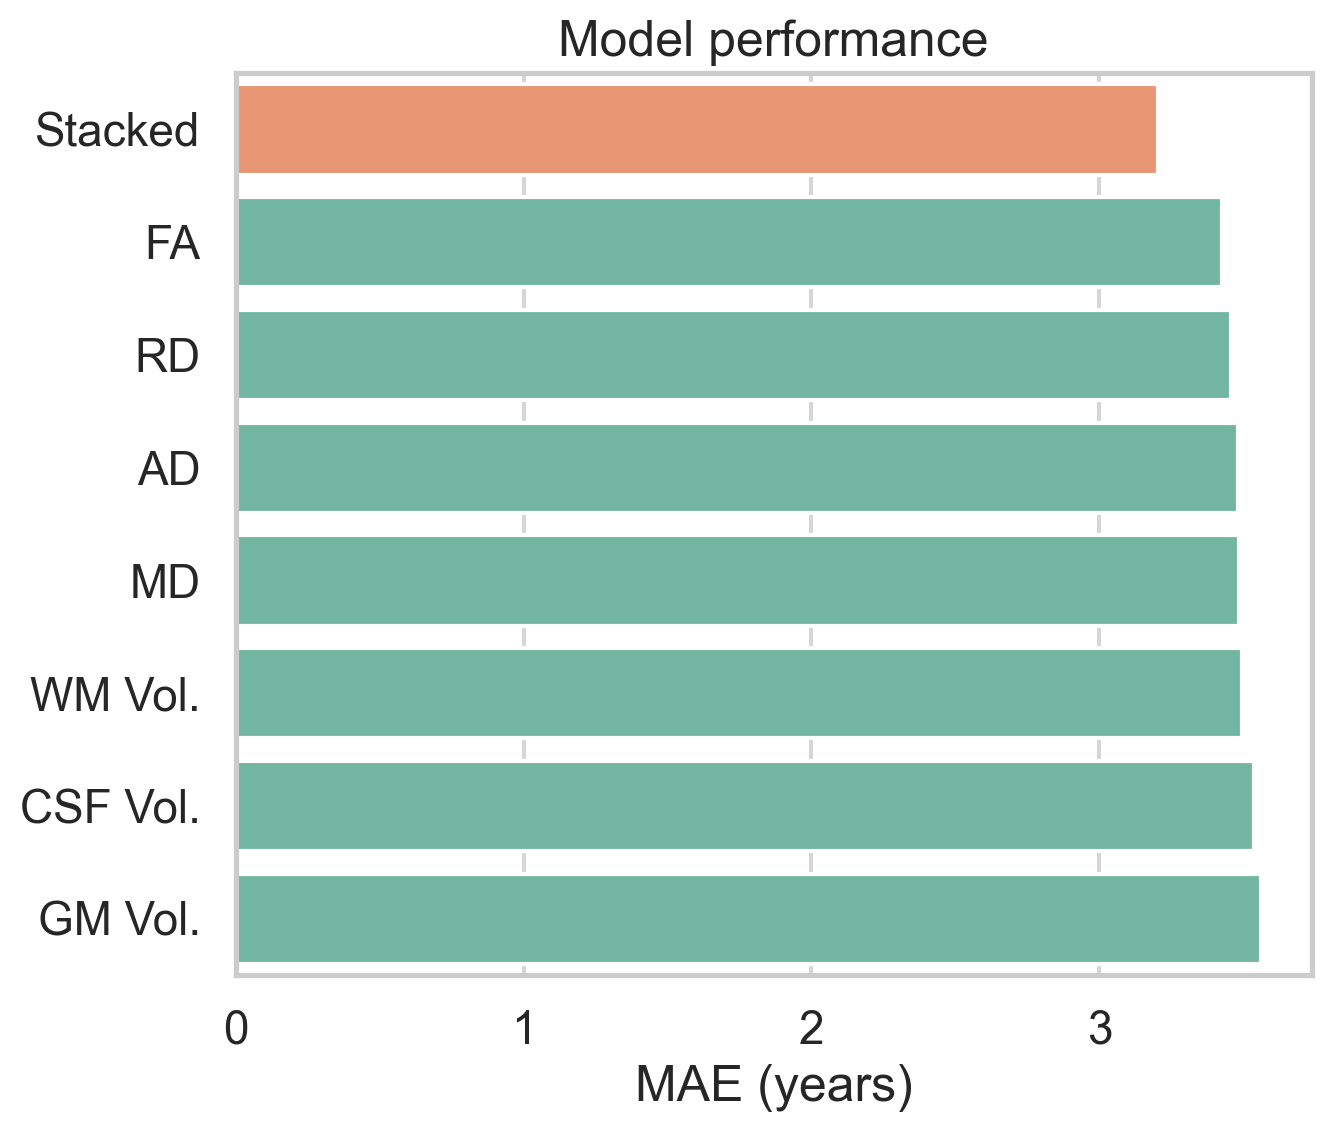

In [16]:
# -----------------------------------------------------------
# 2.  barplot with 95 % BCa bootstrap CIs on R²
# -----------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

ticks_mapping = {
    "gm_vol": "GM Vol.",
    "wm_vol": "WM Vol.",
    "csf_vol": "CSF Vol.",
    "rd": "RD",
    "fa": "FA",
    "ad": "AD",
    "adc": "MD",
    "stacked": "Stacked",
}

fig, ax = plt.subplots(figsize=(7, 6))
sns.barplot(
    y="metric", x=m, data=perf_df.reset_index(), ax=ax, orient="h", hue="is_best", legend=False
)
# ax.errorbar(
#     x=np.arange(len(perf_df)),
#     y=perf_df["RMSE"],
#     # yerr=[perf_df["R2"] - ci_lo, ci_hi - perf_df["R2"]],
#     fmt="none",

#     capsize=4,
#     color="k",
#     lw=1,
# )
# change the y-ticks to the metric names
ax.set_yticks(np.arange(len(perf_df)))
ax.set_yticklabels([ticks_mapping.get(m, m) for m in perf_df.index])
# ax.set_ylabel("$R^{2}$  (10× CV, bias-corrected)")
ax.set_xlabel("MAE (years)")
ax.set_ylabel("")
ax.set_title("Model performance")
# ax.set_xticks(np.arange(0, 1.1, 0.1))
# ax.set_ylim(0.8, perf_df["R2"].max() * 1.15)
plt.tight_layout()
# # ax.set_xlim(3,6)
# savefig_nice(
#     fig,
#     OUTPUT_DIR / "model_performance.png",
#     tight=True,
#     dpi=300,
# )
# # plt.show()

In [ ]:
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols, wls


def class_balance_weights(s, target_mix=None):
    # s: Series with values "True"/"False" for athlete/control (strings)
    p_obs = s.value_counts(normalize=True).to_dict()
    if target_mix is None:
        target_mix = {True: 0.5, False: 0.5}  # choose your target mix
    return s.map(lambda g: target_mix[g] / p_obs[g])


def analyze_with_class_weights(df, target_mix=None, robust=None, metric: str = "adc"):
    d = df.dropna(subset=["corrected_residuals", "target", "sex", "age_at_scan"]).copy()
    d["target"] = d["target"].astype(bool)
    d["sex"] = d["sex"].astype(str)
    d["age_c"] = d["age_at_scan"] - d["age_at_scan"].mean()
    w = class_balance_weights(d["target"], target_mix=target_mix)

    formula = (
        "corrected_residuals ~ C(target, Treatment(reference=False)) "
        "+ C(sex) + age_c + I(age_c**2)"
    )
    if "vol" in metric:
        formula += " + tiv"

    fit = wls(formula, data=d, weights=w).fit(cov_type=(robust or "nonrobust"))

    # effect (athletes vs controls) is the coefficient on the target indicator:
    coef_name = [k for k in fit.params.index if k.startswith("C(target")][0]
    t = fit.tvalues[coef_name]
    df_r = fit.df_resid
    r_partial = np.sign(t) * np.sqrt(t**2 / (t**2 + df_r))
    r2_partial = t**2 / (t**2 + df_r)
    out = {
        "target_mix": target_mix or {"True": 0.5, "False": 0.5},
        "coef_delta": float(fit.params[coef_name]),
        "t": float(t),
        "r_partial": float(r_partial),
        "r2_partial": float(r2_partial),
        "ci95": tuple(map(float, fit.conf_int().loc[coef_name])),
        "p_value": float(fit.pvalues[coef_name]),
        "n": len(d),
        # effective n is useful to report with weights:
        "effective_n": float((w.sum() ** 2) / (w.pow(2).sum())),
    }
    return out, fit


results = pd.DataFrame(columns=["group", "metric"])
for group in ["all", "Climbing", "Bjj"]:
    for metric in metrics + ["stacked"]:
        metric_df = predictions[metric].copy()
        metric_df = metric_df[metric_df["cs_valid"]]
        metric_df["BMI"] = metric_df["weight"] / ((metric_df["height"] / 100) ** 2)
        if group != "all":
            metric_df = metric_df.drop(
                metric_df[metric_df["target"] & (metric_df["group"] != group)].index
            )
        # break
        out, res = analyze_with_class_weights(
            metric_df, target_mix=None, robust=None, metric=metric
        )
        i = len(results)
        for key, val in out.items():
            if key == "ci95":
                results.loc[i, f"{key}_lower"] = val[0]
                results.loc[i, f"{key}_upper"] = val[1]
            elif key == "target_mix":
                results.loc[i, f"{key}_athlete"] = val["True"]
                results.loc[i, f"{key}_control"] = val["False"]
            else:
                results.loc[i, key] = val
            results.loc[i, "group"] = group
            results.loc[i, "metric"] = metric
    #     break
    # break
    # w = class_balance_weights(metric_df["target"])
    # model = wls("corrected_residuals ~ C(target) + age_at_scan + C(sex)", data=metric_df, weights=w).fit()
    # print(metric, model.tvalues["C(target)[T.True]"], model.pvalues["C(target)[T.True]"])
    # break
    # model.summary()
    # sns.boxplot(x="target", y="corrected_residuals", data=predictions["gm_vol"])

In [34]:
metric_df

,Label Name,alcohol,animal_based_phobia,anxiety,attention_disorders,b5_agreeableness,b5_conscientiousness,b5_emotional_stability,b5_extraversion,b5_openness,...,water,weekly_workouts,weight,working_with_computer_times_per_week,years_in_residence,age_at_scan,True,Predicted,corrected_residuals,BMI
session_id,,,,,,,,,,,,,,,,,,,,,
201811131636,7Networks_LH_Vis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37.94,37.94,37.081382,-0.858618,NaN
201811221151,7Networks_LH_Vis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.75,31.75,30.851690,-0.898310,NaN
201811251349,7Networks_LH_Vis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29.02,29.02,27.000657,-2.019343,NaN
201811270913,7Networks_LH_Vis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37.93,37.93,40.041199,2.111199,NaN
201811271010,7Networks_LH_Vis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.25,34.25,49.170373,14.920373,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202507111231,7Networks_LH_Vis,5.0,NaN,True,False,3.78,NaN,2.25,3.38,3.4,...,8.0,0.0,52.25,NaN,1.0,29.69,29.69,33.025232,3.335232,19.308765
202507111324,7Networks_LH_Vis,1.0,NaN,False,False,3.78,NaN,2.63,1.88,3.9,...,15.0,3.0,65.00,NaN,5.0,29.85,29.85,30.039848,0.189848,20.515086
202507161906,7Networks_LH_Vis,0.0,0.0,False,False,4.11,3.78,3.13,3.25,2.8,...,10.0,0.0,99.00,0.0,36.5,36.45,36.45,37.920978,1.470978,35.076531


In [35]:
results.sort_values("p_value")

,group,metric,target_mix_athlete,target_mix_control,coef_delta,t,r_partial,r2_partial,ci95_lower,ci95_upper,p_value,n,effective_n
14,Climbing,rd,0.5,0.5,-1.079310,-5.657515,-0.128480,0.016507,-1.453459,-0.705161,1.768429e-08,1911.0,556.274202
18,Bjj,csf_vol,0.5,0.5,-1.067903,-4.784845,-0.110949,0.012310,-1.505625,-0.630181,1.847866e-06,1841.0,309.744704
6,all,rd,0.5,0.5,-0.855493,-4.337820,-0.096663,0.009344,-1.242266,-0.468720,1.510843e-05,1999.0,841.700850
15,Climbing,stacked,0.5,0.5,-0.710988,-3.972640,-0.090597,0.008208,-1.061988,-0.359988,7.372338e-05,1911.0,556.274202
11,Climbing,adc,0.5,0.5,-0.753752,-3.907787,-0.089130,0.007944,-1.132039,-0.375465,9.639697e-05,1911.0,556.274202
2,all,csf_vol,0.5,0.5,-0.756698,-3.767892,-0.084060,0.007066,-1.150553,-0.362844,1.694095e-04,1999.0,841.700850
10,Climbing,csf_vol,0.5,0.5,-0.713116,-3.547704,-0.080974,0.006557,-1.107334,-0.318898,3.979985e-04,1911.0,556.274202
20,Bjj,fa,0.5,0.5,0.643179,2.885628,0.067174,0.004512,0.206034,1.080325,3.951922e-03,1841.0,309.744704
7,all,stacked,0.5,0.5,-0.507609,-2.810209,-0.062793,0.003943,-0.861853,-0.153365,4.999242e-03,1999.0,841.700850
12,Climbing,fa,0.5,0.5,-0.553933,-2.770981,-0.063327,0.004010,-0.945989,-0.161878,5.643001e-03,1911.0,556.274202


/tmp/ipykernel_2288534/208659564.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ticks_mapping.get(m, m) for m in perf_df.index])


Text(0, 0.5, 'Value')

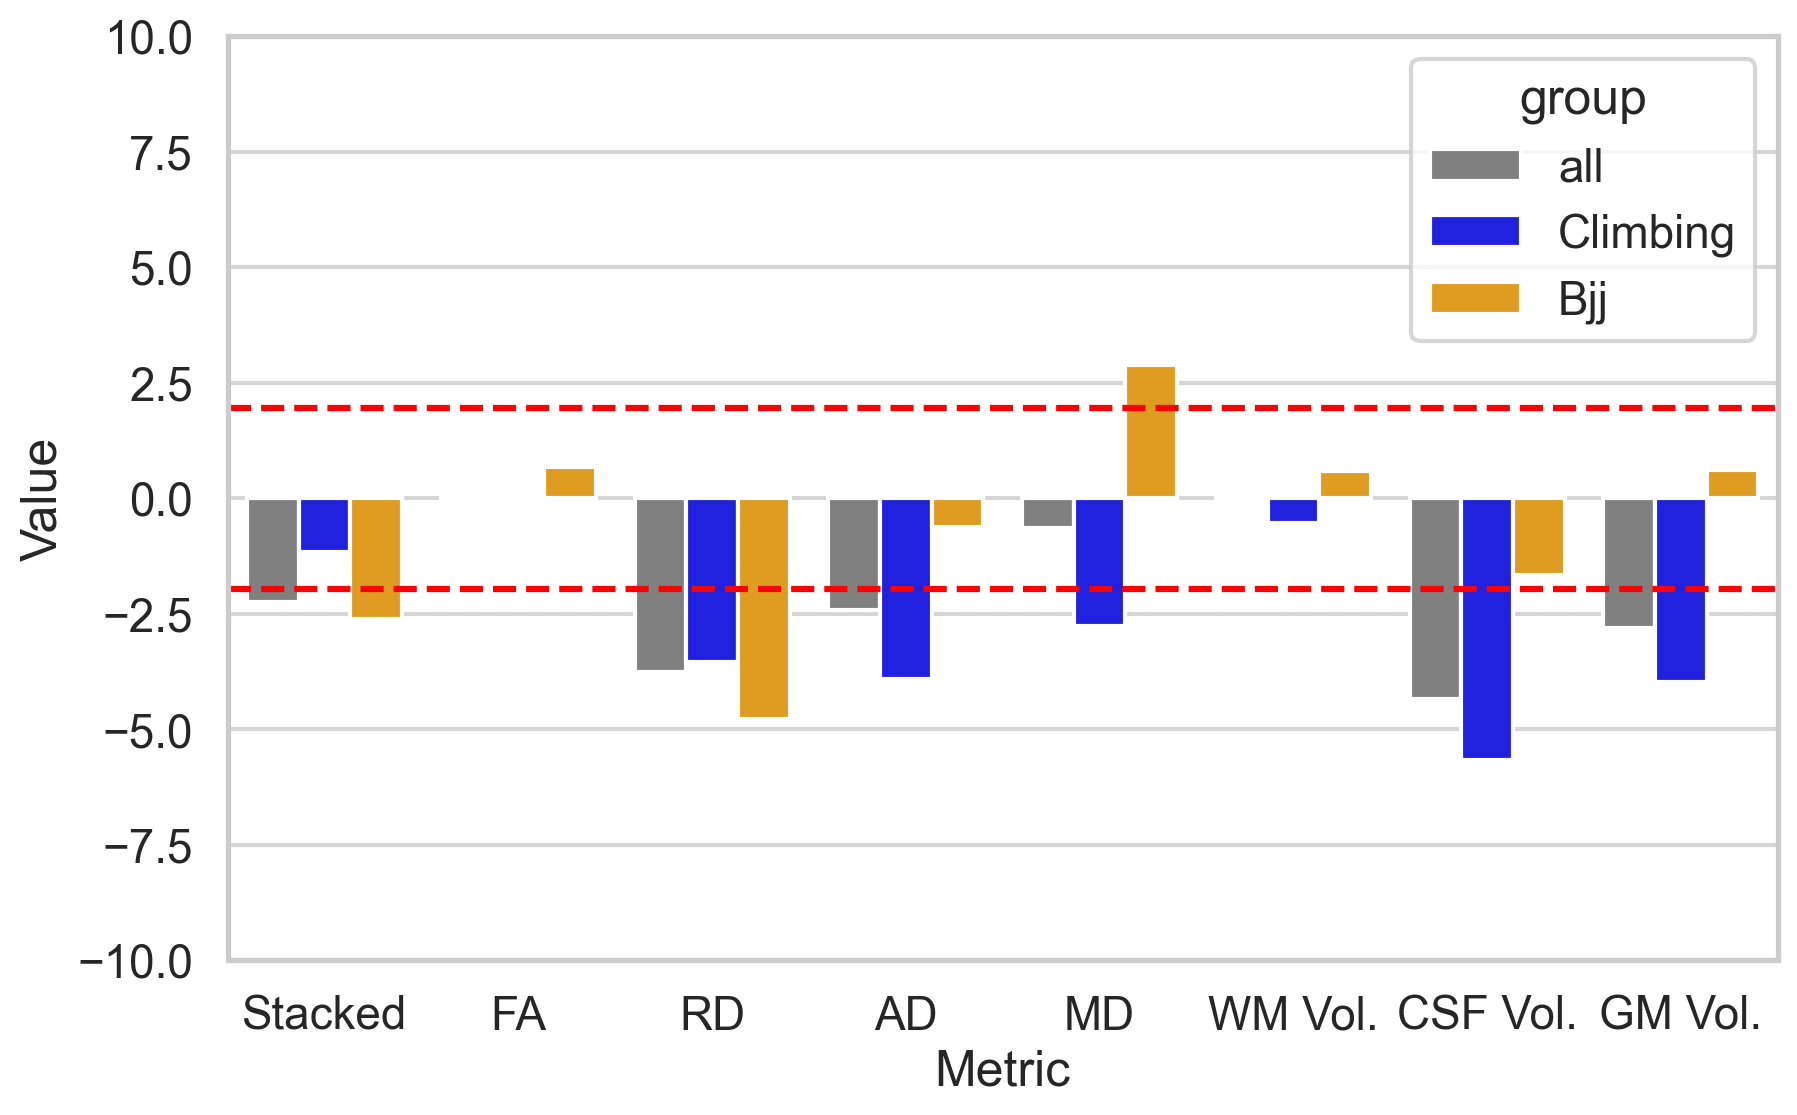

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

group_colors = {"all": "gray", "Climbing": "blue", "Bjj": "orange"}

ticks_mapping = {
    "gm_vol": "GM Vol.",
    "wm_vol": "WM Vol.",
    "csf_vol": "CSF Vol.",
    "rd": "RD",
    "fa": "FA",
    "ad": "AD",
    "adc": "MD",
    "stacked": "Stacked",
}

parameter = "t"

sns.barplot(
    data=results,
    x="metric",
    y=parameter,
    hue="group",
    ax=ax,
    palette=group_colors,
    dodge=True,
)
# set y-axis limits
ax.set_ylim(-10, 10)
# add horizontal line at t = 1.96
ax.axhline(y=1.96, color="red", linestyle="--")
ax.axhline(y=-1.96, color="red", linestyle="--")
# set x-axis label
ax.set_xlabel("Metric")
# change x-axis tick labels
ax.set_xticklabels([ticks_mapping.get(m, m) for m in perf_df.index])
# set y-axis label
ax.set_ylabel("Value")